In [54]:
#이상검증
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

from fbprophet import Prophet
from datetime import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [5]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred, average='macro')
    print('정확도 : {0: .2f}, 정밀도 : {1: .2f}, 재현율 : {2: .2f}'.format(accuracy, precision, recall))
    print('f1-score : {0: .2f}, auc : {1: .2f}'.format(f1, roc_score))

In [6]:
data = pd.read_csv('./data/creditcard.csv')

In [8]:
data.shape

(284807, 31)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.iloc[:,-1].value_counts() #정상건수 0, 사기건수 1로 표시

0    284315
1       492
Name: Class, dtype: int64

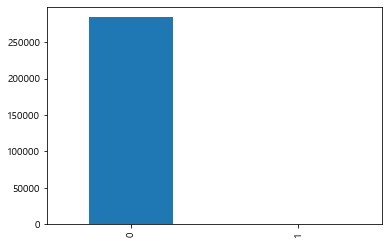

In [13]:
data.iloc[:,-1].value_counts().plot(kind='bar')

In [14]:
data.iloc[:,-1].value_counts() / data.iloc[:,-1].count() * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [40]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [42]:
print(y_train.value_counts() / y_train.count() * 100)
print(y_test.value_counts() / y_test.count() * 100)

0    99.826315
1     0.173685
Name: Class, dtype: float64
0    99.830061
1     0.169939
Name: Class, dtype: float64


In [43]:
# 모델을 트레이닝하고 평가하는 함수
def modeling(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    metrics(y_test, pred) 

In [50]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#로지스틱회귀
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 :  1.00, 정밀도 :  0.72, 재현율 :  0.65
f1-score :  0.69, auc :  0.83


In [51]:
#LightGBM
lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb, X_train, X_test, y_train, y_test )

정확도 :  1.00, 정밀도 :  0.95, 재현율 :  0.83
f1-score :  0.88, auc :  0.91


In [52]:
##데이터 정규화를 시행한 후 다시 머신러닝을 수행해보자

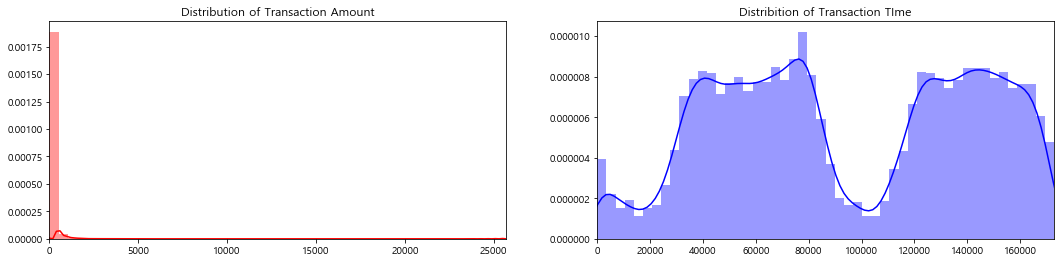

In [55]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title("Distribution of Transaction Amount")
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title("Distribition of Transaction TIme")
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show() #데이터 분포가 고르지 않음

In [57]:
from sklearn.preprocessing import StandardScaler

# Amount컬럼 정규화
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [59]:
data['loged_amount'] = np.log1p(data['Amount'].values.reshape(-1, 1))

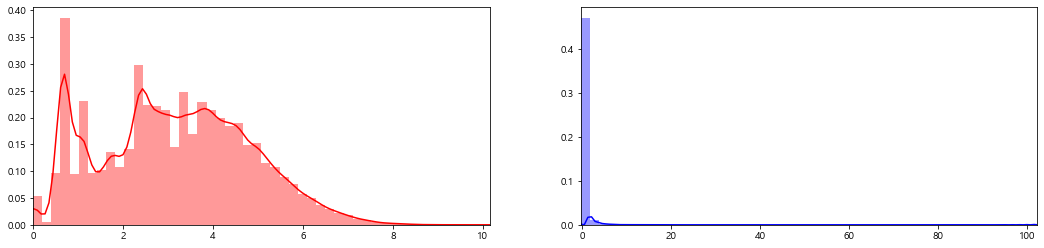

In [60]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
loged_amount = data['loged_amount'].values
scaled_amount = data['scaled_amount'].values

sns.distplot(loged_amount, ax=ax[0], color='r')
ax[0].set_xlim([min(loged_amount), max(loged_amount)])

sns.distplot(scaled_amount, ax=ax[1], color='b')
ax[1].set_xlim([min(scaled_amount), max(scaled_amount)]) #기존 amount컬럼과 데이터 분포 유사

plt.show()

In [64]:
from sklearn.preprocessing import RobustScaler

# Time컬럼 정규화
rob_scaler = RobustScaler()

data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data['loged_time'] = np.log1p(data['Time'].values.reshape(-1,1))
data['std_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))


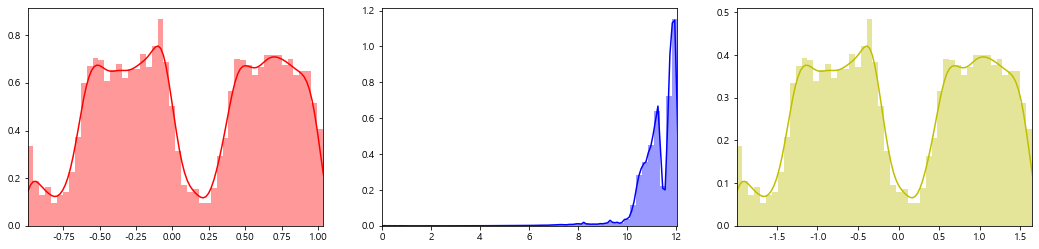

In [65]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
scaled_time = data['scaled_time'].values
loged_time = data['loged_time'].values
std_time = data['std_time'].values

sns.distplot(scaled_time, ax=ax[0], color='r')
ax[0].set_xlim([min(scaled_time), max(scaled_time)])

sns.distplot(loged_time, ax=ax[1], color='b')
ax[1].set_xlim([min(loged_time), max(loged_time)])

sns.distplot(std_time, ax=ax[2], color='y')
ax[2].set_xlim([min(std_time), max(std_time)])

plt.show() #scaled_time과 std_time이 기존 time컬럼하고 비슷하고 scaled_time이 분포범위가 좁아서 채택

In [66]:
#정규화 데이터 추가 및 불필요한 데이터 제거
data.drop(['loged_time', 'std_time', 'loged_amount', 'Time', 'Amount'], axis=1, inplace=True)

In [67]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-0.994960


In [68]:
#칼럼 순서변경
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']
data.drop(['scaled_time', 'scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [69]:
data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [70]:
#머신러닝 성능 평가
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)  #데이터 분포에 따라 성능이 크게 변함

정확도 :  1.00, 정밀도 :  0.72, 재현율 :  0.65
f1-score :  0.69, auc :  0.83


In [71]:
lgb = LGBMClassifier(n_estimators= 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb, X_train, X_test, y_train, y_test) #데이터 분포에 따라 성능변화 거의없음

정확도 :  1.00, 정밀도 :  0.95, 재현율 :  0.83
f1-score :  0.88, auc :  0.91
